In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

W0201 09:33:09.890835 4630603200 deprecation.py:323] From <ipython-input-2-caf177eacab2>:12: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0201 09:33:09.891521 4630603200 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0201 09:33:09.892360 4630603200 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.data

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/train-images-idx3-ubyte.gz


W0201 09:33:20.375849 4630603200 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0201 09:33:20.380750 4630603200 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/train-labels-idx1-ubyte.gz


W0201 09:33:22.316982 4630603200 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)


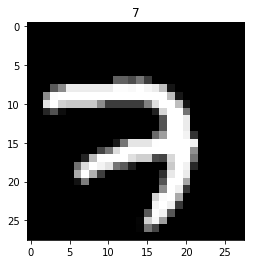

W0201 09:33:23.834460 4630603200 deprecation.py:323] From <ipython-input-2-caf177eacab2>:35: BasicLSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W0201 09:33:23.835913 4630603200 deprecation.py:323] From <ipython-input-2-caf177eacab2>:41: dynamic_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
W0201 09:33:23.895689 4630603200 deprecation.py:506] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1253: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dty

In [2]:
tf.set_random_seed(1)
np.random.seed(1)

# Hyper Parameters
BATCH_SIZE = 60
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
CELL_SIZE = 64
LR = 0.01               # learning rate

# data
mnist = input_data.read_data_sets('./mnist', one_hot=True)              # they has been normalized to range (0,1)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]

# plot one example
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)   # (55000, 10)
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0]))
plt.pause(1)

# tensorflow placeholders
tf_x = tf.placeholder(tf.float32, [None, TIME_STEP * INPUT_SIZE])       # shape(batch, 784)
image = tf.reshape(tf_x, [-1, TIME_STEP, INPUT_SIZE])                   # (batch, height, width, channel)
tf_y = tf.placeholder(tf.int32, [None, 10])                             # input y

# xi = tf.reshape(image, [-1, INPUT_SIZE])
# wi = tf.Variable(tf.random_normal([INPUT_SIZE, CELL_SIZE]))
# bi = tf.Variable(tf.zeros([CELL_SIZE]))
# yi = tf.matmul(xi, wi) + bi
# image = tf.reshape(yi, [-1, TIME_STEP, CELL_SIZE])

# RNN
rnn_cell = tf.contrib.rnn.BasicLSTMCell(num_units=CELL_SIZE)
outputs, (h_c, h_n) = tf.nn.dynamic_rnn(
    rnn_cell,                   # cell you have chosen
    image,                      # input
    initial_state=None,         # the initial hidden state
    dtype=tf.float32,           # must given if set initial_state = None
    time_major=False,           # False: (batch, time step, input); True: (time step, batch, input)
)

# outputs shape [BATCH_SIZE, TIME_STEP, CELL_SIZE]
# o = tf.reshape(outputs, [-1, CELL_SIZE]
output = tf.layers.dense(outputs[:, -1, :], 10)              # output based on the last output step

loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)           # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

In [3]:
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(init_op)     # initialize var in graph

In [11]:
for step in range(1200):    # training
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    o_, os_, _, loss_ = sess.run([output, outputs, train_op, loss], {tf_x: b_x, tf_y: b_y})
    # print("output: ", np.array(o_).shape)
    # print("outputs: ", np.array(os_).shape)
    if step % 50 == 0:      # testing
        accuracy_ = sess.run(accuracy, {tf_x: test_x, tf_y: test_y})
        print('train loss: %.4f' % loss_, '| test accuracy: %.4f' % accuracy_)

train loss: 0.0604 | test accuracy: 0.9575
train loss: 0.0904 | test accuracy: 0.9576
train loss: 0.0432 | test accuracy: 0.9577
train loss: 0.0670 | test accuracy: 0.9579
train loss: 0.0057 | test accuracy: 0.9580
train loss: 0.0039 | test accuracy: 0.9581
train loss: 0.1127 | test accuracy: 0.9582
train loss: 0.0542 | test accuracy: 0.9582
train loss: 0.0029 | test accuracy: 0.9583
train loss: 0.0565 | test accuracy: 0.9584
train loss: 0.0946 | test accuracy: 0.9585
train loss: 0.0061 | test accuracy: 0.9586
train loss: 0.0026 | test accuracy: 0.9587
train loss: 0.0049 | test accuracy: 0.9588
train loss: 0.1943 | test accuracy: 0.9589
train loss: 0.0286 | test accuracy: 0.9590
train loss: 0.0195 | test accuracy: 0.9591
train loss: 0.0091 | test accuracy: 0.9592
train loss: 0.0070 | test accuracy: 0.9593
train loss: 0.0106 | test accuracy: 0.9594
train loss: 0.0349 | test accuracy: 0.9595
train loss: 0.0154 | test accuracy: 0.9595
train loss: 0.0268 | test accuracy: 0.9596
train loss:

In [12]:
# print 10 predictions from test data
test_output = sess.run(output, {tf_x: test_x[:10]})
pred_y = np.argmax(test_output, 1)
print(pred_y, 'prediction number')
print(np.argmax(test_y[:10], 1), 'real number')

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 2 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9] prediction number
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9] real number
